# CLASE 3.1 – Reducción de dimensionalidad.
---

## Introducción.
Previamente, nos adentramos en profundidad en el mundo de los **alogritmos de aprendizaje supervisado**. Desde una perspectiva muy didáctica, establecimos que tales algoritmos simplemente se entrenan sobre conjuntos de datos etiquetados, de manera tal que a cada instancia $i$, digamos $\mathbf{x}_{i}$, de un tal conjunto, siempre le corresponde una respuesta $y_{i}$ (o más, de ser necesario). El objetivo de los algoritmos de aprendizaje supervisado es, por tanto, estimar una "posible" relación funcional $f$ tal que $y_{i}=f(\mathbf{x}_{i})$ para todo $i$. El cómo construimos $f$ es harina de otro costal, y de ahí derivan una serie de algoritmos de aprendizaje, algunos de los cuales ya estudiamos con lujo de detalles en las secciones anteriores.

Sin embargo, ahora nos sumergiremos en un mundo un tanto diferente, en el cual no existirán datos etiquetados. Dicho de otra forma, consideraremos conjuntos de entrenamiento de la forma $\mathcal{D} =\left\{ \mathbf{X} \in \mathbb{R}^{m\times n} \  :\  \mathbf{X} =\left\{ x_{ij} \right\} \wedge x_{ij}\in \mathcal{X} \right\}$, poblados únicamente por una matriz de diseño $\mathbf{X}$ cuyos elementos $x_{ij}$ se asumirán como realizaciones que "viven" en un espacio de entrada $\mathcal{X}$. Notemos que ahora ya no existe el vector de valores observados $\mathbf{y}$ que asociaba a cada fila de $\mathbf{X}$ un rótulo o etiqueta, por lo que, para conjuntos como $\mathcal{D}$, no estaremos seguros, *a priori*, de las relaciones que deseamos describir. Un problema de este tipo se denomina **no supervisado**, así como a los algoritmos de aprendizaje que podemos construir a partir de él.

Pero, si no hay una "meta" a la que queremos llegar (no tenemos un "supervisor" que nos indique explícitamente qué tenemos que predecir), entonces... ¿Qué aprendemos? La respuesta se encuentra en la **estructura subyacente de los datos**. En un problema no supervisado, nuestro objetivo no es clasificar ni predecir una variable objetivo; más bien, buscamos patrones, relaciones y/o representaciones que nos ayuden a describir y entender la naturaleza intrínseca de los datos.

Dentro de este paradigma de aprendizaje, podemos reconocer varios tipos de problemas para los cuales es clave tener una idea general de los aspectos estructurales inherentes a nuestros datos, entre los cuales destacan:

- **Clustering o agrupamiento:** Descubrir subgrupos o "clusters" dentro de los datos, de modo que las observaciones que caen en un mismo grupo compartan ciertas características o similitudes (por ejemplo, agrupar muestras de rocas que llegan a una planta concentradora que son geológicamente similares).
- **Métodos de reducción de la dimensionalidad:** Comprimir información representada por un conjunto de datos de alta dimensión en un espacio de menor dimensión, preservando (en la medida de lo posible) las características esenciales y la estructura de los datos.
- **Detección de anomalías o rarezas:** Identificar observaciones que se desvían significativamente de la mayoría, es decir, posibles valores atípicos (outliers). Este tipo de algoritmos es muy útil para la detección de derivas o patrones atípicos en procesos que deben ser estables, como los signos vitales de un equipo mecánico o electrohidráulico en un contexto de mantenimiento.
- **Aprendizaje de representaciones:** Aprender nuevas formas de codificar los datos (por ejemplo, representaciones en espacios latentes) que puedan ser útiles para otras tareas subsecuentes. Este tipo de algoritmos quedan fuera del alcance de estos apuntes, ya que requieren de artilugios propios de la **teoría del aprendizaje profundo**.

En esta sección, nos dedicaremos a explorar en detalle los **algoritmos de reducción de dimensionalidad**. La premisa que motiva el uso de estos algoritmos es fundamentalmente práctica, ya que el trabajo directo con conjuntos de datos de alta dimensión, tales como imágenes, implica ciertas dificultades: Pueden resultar difíciles de analizar, sus interpretaciones puede ser aún más difíciles, sus visualizaciones muchas veces se tornan imposibles y (en casos prácticos) el almacenamiento y posterior procesamiento de este tipo de conjuntos de datos puede resultar muy costoso. Sin embargo, tales conjuntos de datos muchas veces presentan ciertas propiedades que podemos aprovechar. Por ejemplo, con frecuencia, los conjuntos de datos de alta dimensión presentan **problemas de sobrecompletitud**; es decir, una o más variables (columnas) pueden ser redundantes y/o ser explicadas como combinación de otras variables. Más aún, cuando la dimensión de un conjunto de datos es muy alta, es común que existan correlaciones entre varias variables, lo que comúnmente implica que la estructura inherente a los datos sea mucho más simple. Es decir, que tenga una menor dimensión. Los **algoritmos de reducción de la dimensionalidad** explotan estos aspectos estructurales y las correlaciones existentes entre las distintas variables que constituyen un conjunto de datos, a fin de construir representaciones mucho más compactas de dicho conjunto, idealmente, sin perder mucha información (relevante). Podemos pensar en este tipo de algoritmos como técnicas de **compresión** similares a las existentes en el almacenamiento de ciertos objetos en medios computacionales como imágenes y pistas de audio, ya que hay formatos especializados en comprimir estos contenidos sin perder información relevante (como `jpeg` y `mp3`, respectivamente).

**Ejemplo 1.1 – La maldición de la dimensionalidad:** Consideremos el problema de estimar la distancia media entre dos puntos elegidos al azar pertenecientes al interior de un hipercubo de dimensión $n$ e hiperarista $a$. Tal hipercubo puede definirse como una "figura" compacta y cerrada cuyos "bordes" tienen todos la misma dimensión, son paralelos entre sí y conforman ángulos rectos con respecto a los "bordes" contiguos. De esta manera, para $n=0$, un hipercubo se representa por medio de un punto; si $n=1$, por medio de un segmento de longitud $a$; si $n=2$, por medio de un cuadrado de lado $a$; y si $n=3$, por medio de un cubo de arista $a$.

Para ilustrar la idea, comencemos por el caso $n=1$. En $\mathbb{R}$, nuestro "hipercubo" puede representarse por medio del intervalo cerrado $[0, a]$. Escojamos dos puntos $x_{1}\wedge x_{2}$ de manera uniforme en dicho intervalo. La distancia entre estos puntos puede definirse como $d=\left| x_{1}-x_{2} \right|$, por lo que el valor esperado de dicha distancia puede calcularse por medio de la fórmula

$$\mathrm{E} \left[ d \right] =\frac{1}{a^{2}} \iint_{R} \left| x_{1}-x_{2} \right| dx_{1}dx_{2}$$
<p style="text-align: right;">$(1.1)$</p>

Donde $R$ es el rectángulo conformado por el producto cartesiano $[0, a]\times [0, a]$. Notemos que

$$\left| x_{1}-x_{2} \right| =\begin{cases}x_{1}-x_{2}&;\  \mathrm{si} \  x_{1}\geq x_{2}\\ x_{2}-x_{1}&;\  \mathrm{si} \  x_{1}<x_{2}\end{cases}$$
<p style="text-align: right;">$(1.2)$</p>

Por simetría, basta con integrar sobre la mitad de $R$ tal que $x_{1}\geq x_{2}$ y luego multiplicar este resultado por $2$. Así que

$$\begin{array}{lll}\mathrm{E} \left[ d \right]&=&\displaystyle \frac{2}{a^{2}} \int_{0}^{a} \int_{0}^{x_{1}} \left( x_{1}-x_{2} \right) dx_{2}dx_{1}\\ &=&\displaystyle \frac{2}{a^{2}} \int_{0}^{a} \left[ \int_{0}^{x_{1}} \left( x_{1}-x_{2} \right) dx_{2} \right] dx_{1}\\ &=&\displaystyle \frac{2}{a^{2}} \int_{0}^{a} \frac{x_{1}^{2}}{2} dx_{1}\\ &=&\displaystyle \frac{1}{a^{2}} \frac{a^{3}}{3}\\ &=&\displaystyle \frac{a}{3}\end{array}$$
<p style="text-align: right;">$(1.3)$</p>

Por lo tanto, el valor esperado de la distancia entre dos puntos $x_{1}$ y $x_{2}$ uniformes en un segmento rectilíneo de longitud $a$ es $\frac{a}{3}$. Consideremos ahora el caso $n=2$, correspondiente a un cuadrado de lado $a$, y que puede representarse de manera sencilla por medio del producto cartesiano de dos intervalos cerrados como el anterior; es decir, $[0, a]\times [0, a]$. Escojamos dos puntos al azar de manera uniforme del interior de este cuadrado, digamos $\mathbf{x}_{1}=(x_{1},y_{1})$ y $\mathbf{x}_{2}=(x_{2},y_{2})$. La distancia Euclidiana entre estos puntos será

$$d=\left\Vert \mathbf{x}_{1} -\mathbf{x}_{2} \right\Vert =\sqrt{(x_{1}-x_{2})^{2}-(y_{1}-y_{2})^{2}}$$
<p style="text-align: right;">$(1.4)$</p>

El valor esperado de esta distancia puede calcularse por medio de la fórmula

$$\begin{array}{lll}\mathrm{E} \left[ d \right]&=&\displaystyle \frac{1}{a^{4}} \int_{D\times D} \left\Vert \mathbf{x}_{1} -\mathbf{x}_{2} \right\Vert d\mathbf{x}_{1} d\mathbf{x}_{2}\\ &=&\displaystyle \frac{1}{a^{4}} \int_{\left( \left[ 0,a \right] \right)^{4}} \sqrt{(x_{1}-x_{2})^{2}+(y_{1}-y_{2})^{2}} dx_{1}dx_{2}dy_{1}dy_{2}\end{array}$$
<p style="text-align: right;">$(1.5)$</p>

Donde $D\subset \mathbb{R}^{4}$ es el "producto cartesiano" del cuadrado consigo mismo: $D=\left(\left[ 0,a \right]\right)^{4}$, donde el superíndice $4$ en la expresión anterior indica que la operación de producto cartesiano se realiza tal número de veces. Una forma de resolver la integral (1.5) es por medio de un cambio de coordenadas afines del tipo $U=x_{1}-x_{2}\wedge V=y_{1}-y_{2}$, lo que equivale a determinar la función de densidad conjunta del vector aleatorio $(U, V)$. Notemos que la variable aleatoria $U$, que representa la diferencia de dos variables uniformemente distribuidas en $[0, a]$, se distribuye triangularmente en $[-a, a]$, con función de densidad

$$f_{U}\left( u \right) =\begin{cases}\displaystyle \frac{a-\left| u \right|}{a^{2}}&;\  \mathrm{si} \  -a\leq x\leq a\\ 0&;\  \mathrm{en\  caso\  contrario}\end{cases}$$
<p style="text-align: right;">$(1.6)$</p>

Análogamente, $V$ es independiente y con la misma función de densidad. De esta manera, la función de densidad conjunta $f_{UV}(u,v)$ puede expresarse como el producto de las correspondientes funciones marginales $f_{U}(u)$ y $f_{V}(v)$. Es decir,

$$f_{UV}\left( u,v \right) =\frac{1}{a^{4}} \left( a-\left| u \right| \right) \left( a-\left| v \right| \right) \  ;\  \forall \left( u,v \right) \in \left[ -a,a \right] \times \left[ -a,a \right]$$
<p style="text-align: right;">$(1.7)$</p>

Entonces,

$$\begin{array}{lll}\mathrm{E} \left[ d \right]&=&\displaystyle \iint_{\left( \left[ -a,a \right] \right)^{2}} \sqrt{u^{2}+v^{2}} du\  dv\\ &=&\displaystyle \frac{1}{a^{4}} \int_{-a}^{a} \int_{-a}^{a} \left( a-\left| u \right| \right) \left( a-\left| v \right| \right) du\  dv\\ &=&\displaystyle \frac{4}{a^{4}} \int_{0}^{a} \int_{0}^{a} \sqrt{u^{2}+v^{2}} \left( a-\left| u \right| \right) \left( a-\left| v \right| \right) du\  dv\  ;\  u\geq 0,v\geq 0\end{array}$$
<p style="text-align: right;">$(1.8)$</p>

El valor de la integral (1.8) es un resultado relativamente famoso en matemáticas, siendo aproximadamente igual a $\mathrm{E}[d]\approx0.52\ a$. Por lo tanto, la distancia media de dos puntos escogidos al azar del interior de un cuadrado de lado arbitrario es, en efecto, igual (aproximadamente) a un factor de $0.52$ veces su lado.

Veamos ahora el caso $n=3$, que corresponde a un cubo de arista $a$. Dicho cubo puede construirse en $\mathbb{R}^{3}$ por medio del triple producto cartesiano del intervalo cerrado $[0, a]$ consigo mismo. Designamos como $V=([0,a])^{3}$ a este cubo y seleccionamos dos puntos interiores $\mathbf{x}_{1}=(x_{1},y_{1},z_{1})$ y $\mathbf{x}_{2}=(x_{2},y_{2},z_{2})$ uniformemente. Siguiendo la misma idea que hemos estado extendiendo desde el caso $n=1$, se tendrá que

$$\begin{array}{lll}\mathrm{E} \left[ d \right]&=&\displaystyle \frac{1}{a^{6}} \int_{V\times V} \left\Vert \mathbf{x}_{1} -\mathbf{x}_{2} \right\Vert d\mathbf{x}_{1} d\mathbf{x}_{2}\\ &=&\displaystyle \frac{1}{a^{6}} \int_{\left( \left[ 0,a \right] \right)^{6}} \sqrt{(x_{1}-x_{2})^{2}+(y_{1}-y_{2})^{2}+(z_{1}-z_{2})^{2}} dx_{1}dx_{2}dy_{1}dy_{2}dz_{1}dz_{2}\end{array}$$
<p style="text-align: right;">$(1.9)$</p>

Análogamente al caso $n=2$, hacemos el cambio de variables $U=x_{1}-x_{2}$, $V=y_{1}-y_{2}$ y $W=z_{1}-z_{2}$. Cada nueva coordenada representa una variable aleatoria independiente triangularmente distribuida en $[-a,a]$. También de manera análoga, podemos expresar su función de densidad conjunta como

$$f_{UVW}\left( u,v,w \right) =\frac{1}{a^{6}} \left( a-\left| u \right| \right) \left( a-\left| v \right| \right) \left( a-\left| w \right| \right) \  ;\  \forall \left( u,v,w \right) \in \left( \left[ -a,a \right] \right)^{3}$$
<p style="text-align: right;">$(1.10)$</p>

$$\begin{array}{lll}\mathrm{E} \left[ d \right]&=&\displaystyle \frac{1}{a^{6}} \int_{-a}^{a} \int_{-a}^{a} \int_{-a}^{a} \sqrt{u^{2}+v^{2}+w^{2}} \left( a-\left| u \right| \right) \left( a-\left| v \right| \right) \left( a-\left| w \right| \right) du\  dv\  dw\\ &=&\displaystyle \frac{8}{a^{6}} \int_{0}^{a} \int_{0}^{a} \int_{0}^{a} \sqrt{u^{2}+v^{2}+w^{2}} \left( a-\left| u \right| \right) \left( a-\left| v \right| \right) \left( a-\left| w \right| \right) du\  dv\  dw\  ;\  u\geq 0,v\geq 0,w\geq 0\end{array}$$
<p style="text-align: right;">$(1.11)$</p>

El valor de la integral $(1.11)$ es aproximadamente igual a $\mathrm{E}[d]\approx0.66\ a$. Vemos pues que el valor medio de la distancia entre dos puntos escogidos al azar del interior de un cubo de arista arbitraria es igual (aproximadamente) a un factor de $0.66$ veces su arista. 

Hasta ahora, podemos observar un patrón evidente en todos estos cálculos: A medida que $n$ crece, el valor de $\mathrm{E}[d]$ también lo hace. Es decir, mientras mayor sea un número de dimensiones de un (hiper)cubo, mayor será el valor esperado de la distancia entre dos puntos seleccionados al azar del interior de él. Podemos generalizar los desarrollos anteriores a un número $n$ de dimensiones, seleccionando dos puntos al azar $\mathbf{x}\wedge \mathbf{y}$ al interior de un hipercubo en $\mathbb{R}^{n}$ de "lado" (o hiperarista) $a$, definiendo un vector $\mathbf{u}$ cuyas componentes serán las diferencias coordenada a coordenada de estos puntos interiores, cada una triangularmente distribuida en $[-a, a]$. De esta manera, el vector aleatorio $\mathbf{U}$ cuya realización es $\mathbf{u}$ tendrá como función de densidad a $f_{\mathbf{U}}\left( \mathbf{u} \right) =\frac{1}{a^{2n}} \prod_{j=1}^{n} \left( a-\left| u_{i} \right| \right)$ y, por tanto, el valor esperado de la distancia $d$ entre los puntos $\mathbf{x}$ e $\mathbf{y}$ estará dado por la fórmula

$$\mathrm{E} \left[ d \right] =\frac{1}{a^{2n}} \int_{\left( \left[ -a,a \right] \right)^{n}} \left( \sum_{j=1}^{n} u_{i}^{2} \right)^{1/2} \prod_{j=1}^{n} \left( a-\left| u_{i} \right| \right) d\mathbf{u}$$
<p style="text-align: right;">$(1.12)$</p>

El cálculo de la integral (1.12) es extremadamente arduo para $n$ grande, por lo que es muy común recurrir a métodos numéricos como la simulación de Monte Carlo para su aproximación. Como hemos visto para $n\leq 3$, es razonable esperar que el valor de (1.12) sea igual a un factor constante que multiplica a $a$. Por ejemplo, para $n=10000$... ¡Dicho factor crecerá a casi 408.25 unidades! Por supuesto, esto puede resultar un poco contraintuitivo, ya que… ¿Cómo es posible que dos puntos puedan estar tan lejos en el interior del mismo hipercubo unitario? Y bueno, resulta que hay mucho espacio disponible en regiones de alta dimensión. Como resultado, **los conjuntos de datos que "viven" en dominios de alta dimensión corren el riesgo de estar extremadamente dispersos**: Muchas instancias de entrenamiento estarán muy lejos las unas de las otras.

Lo anterior también implica que, en conjuntos de datos de alta dimensión, las instancias nuevas (es decir, de prueba) tenderán a estar "muy lejos" (relativamente) de las instancias de entrenamiento, lo que implica que las predicciones que hagamos sean mucho menos confiables que las que obtendríamos en conjuntos de datos de menor dimensión, ya que estarán basadas en extrapolaciones mucho más "groseras". En palabras más simples, **mientras más dimensiones (variables) tenga un conjunto de entrenamiento, mayor es el riesgo de que nuestros modelos generen overfitting**. Este problema es ampliamente conocido en la ciencia de datos (y la estadística multivariable) como la **maldición de la dimensionalidad** (o, simplemente, **maldición de la dimensión**).

En teoría, una solución a este problema sería incrementar el número de instancias de entrenamiento a fin de reducir la dispersión de nuestros datos en diferentes dimensiones. Sin embargo, resulta que el número de instancias de entrenamiento requeridas para alcanzar una densidad razonable crece exponencialmente con el número de dimensiones. Con sólo 100 variables independientes (una cantidad bastante menor que en el caso del *toyset* **<font color='forestgreen'>IRIS</font>**), necesitaríamos más instancias de entrenamiento que átomos en el universo observable a fin de que dichas instancias alcancen una media de 10% de presencia en cada dimensión, asumiendo por supuesto que éstas se dispersan de manera uniforme en cada dimensión. ◼︎

**Ejemplo 1.2 – Enfoques principales de los algoritmos de reducción de dimensionalidad:** Antes de que comencemos a navegar en los algoritmos disponibles para poder reducir la dimensión de un conjunto de datos, echemos un vistazo a los dos tipos de enfoques que suelen utilizarse como base en el desarrollo de tales algoritmos. Debido a que los conjuntos de datos de alta dimensión suelen estar dispersos en un número menor de dimensiones, estos algoritmos se basan simplemente en la **búsqueda de proyecciones que preserven la varianza original** del conjunto de datos de interés hasta cierto nivel de tolerancia que solemos establecer de forma previa. Dependiendo de la geometría inherente a la de estas proyecciones, los algoritmos de interés serán de reducción **lineal** o **no lineal**.

Sea $\mathcal{D} =\left\{ \mathbf{X} \in \mathbb{R}^{m\times n} \  :\  \mathbf{X} =\left\{ x_{ij} \right\} \wedge x_{ij}\in \mathcal{X} \right\}$ un conjunto de entrenamiento constituido por la matriz de diseño $\mathbf{X}$. Sea $\mathcal{X}$ el espacio de entrada de $\mathcal{D}$, el cual está generado por las filas (instancias) de $\mathbf{X}$ (es decir, $\mathcal{X} =\left\{ \mathbf{x}_{1} ,...,\mathbf{x}_{n} \right\} \wedge \mathbf{x}_{i} \in \mathbb{R}^{n} ;\forall i=1,...,m$). Un resultado inmediato de la dispersión de un conjunto de datos en algunas dimensiones más que otras es que algunas covarianzas entre variables independientes (columnas de $\mathbf{X}$) serán mucho mayores que otras. Por lo tanto, es posible que gran parte de $\mathcal{D}$ esté "embebido" en un subespacio vectorial contenido por $\mathcal{D}$, que evidentemente será de menor dimensión.

Para ilustrar el punto anterior, vamos a construir un conjunto de datos que cumple con estas características:

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [2]:
from scipy.spatial.transform import Rotation

In [3]:
plt.rcParams["figure.dpi"] = 200
sns.set()
plt.style.use("seaborn-v0_8-white")

In [4]:
%matplotlib widget

In [5]:
# Definimos algunos parámetros iniciales.
num_points = 100  # Número de puntos.
noise_level = 1.0  # Nivel de ruido (desviación estándar).
rng = np.random.default_rng(seed=42) # Semilla aleatoria fija.

In [6]:
# Definir nuestro plano base: z = 0.5x + 0.2y + 1.
x = rng.uniform(low=-5, high=5, size=num_points)
y = rng.uniform(low=-5, high=5, size=num_points)
z = 0.5 * x + 0.2 * y + 1 + rng.normal(loc=0, scale=noise_level, size=num_points)

In [7]:
# Constituimos el conjunto de datos.
data = np.vstack([x, y, z]).T

In [8]:
# Creamos una grills para evaluar y graficar la superficie de referencia.
X_grid, Y_grid = np.meshgrid(
    np.linspace(start=-5, stop=5, num=20), np.linspace(start=-5, stop=5, num=20),
)
Z_grid = 0.5 * X_grid + 0.2 * Y_grid + 1  # Ecuación del plano.

In [9]:
# Definimos el vector normal al plano con el que hemos generado el conjunto de datos.
normal = np.array([0.5, 0.2, -1])

In [10]:
# Definimos una función para proyectar un punto ortogonalmente sobre un plano.
def project_onto_plane(point, normal, point_on_plane):
    # Llevamos los puntos a un formato de arreglo de Numpy.
    point = np.array(point)
    point_on_plane = np.array(point_on_plane)

    # Determinamos el vector desde el punto del plano al punto original.
    diff_vector = point - point_on_plane

    # Determinamos la proyección del vector sobre la normal al plano.
    distance = np.dot(diff_vector, normal) / np.dot(normal, normal)

    # Determinamos la proyección ortogonal del punto sobre el plano.
    projected_point = point - distance * normal
    
    return projected_point

In [11]:
# Definimos un punto de referencia sobre el plano (que obviamente satisface su ecuación).
point_on_plane = np.array([0, 0, 1])

In [12]:
# Determinamos las proyecciones ortogonales de cada punto del conjunto de datos sobre el plano.
projections = np.array([project_onto_plane(p_m, normal, point_on_plane) for p_m in data])

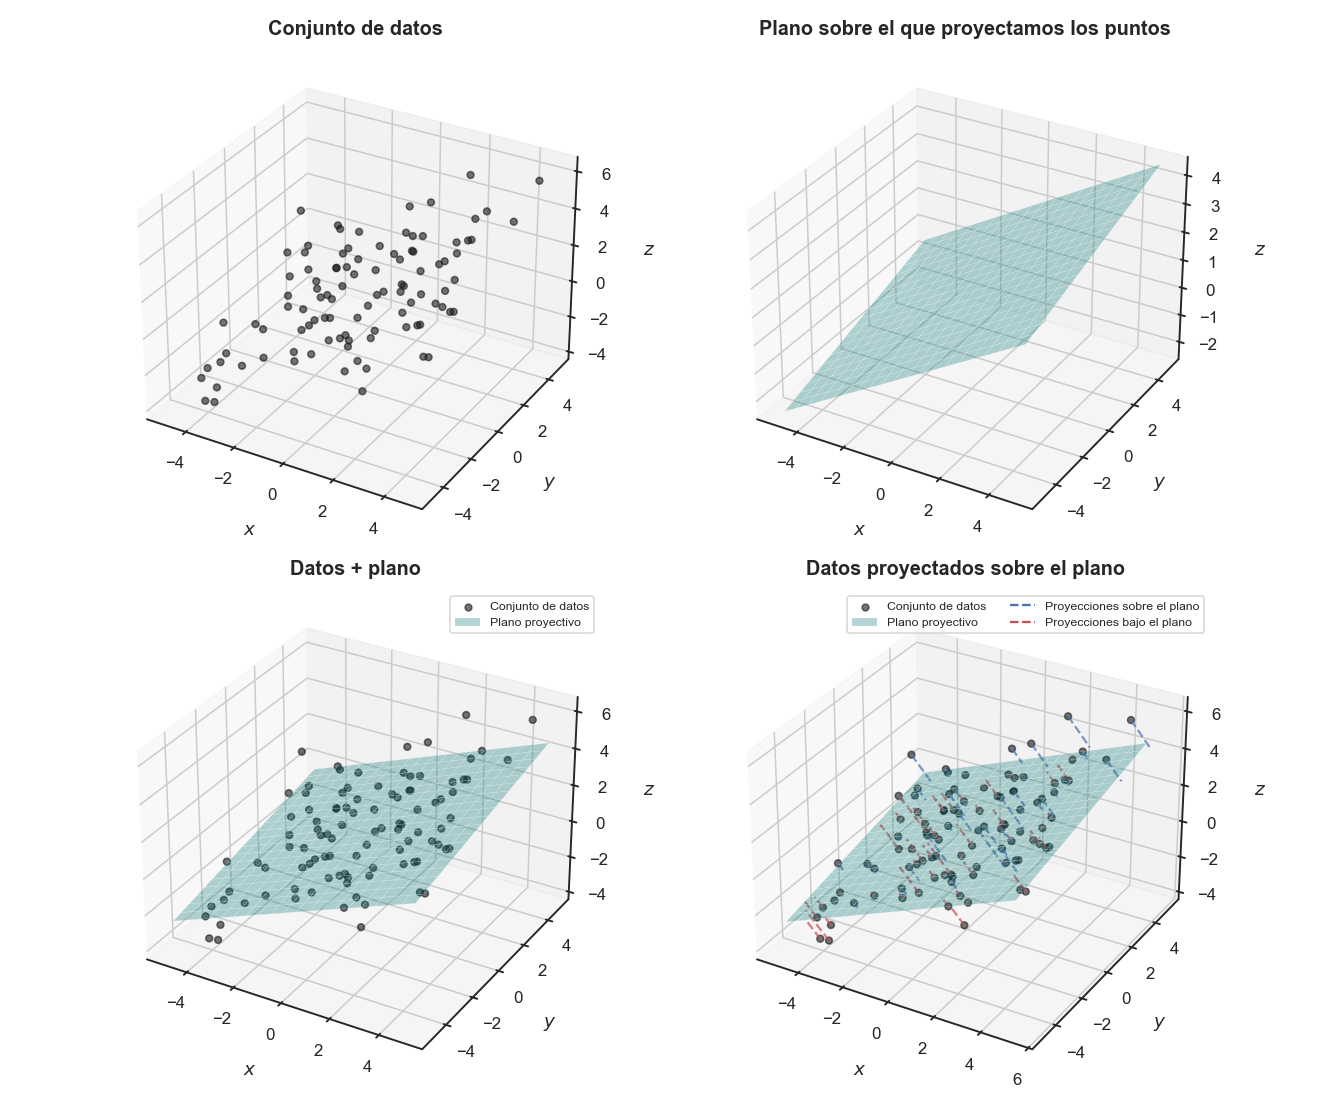

In [13]:
# Creamos la base de nuestro gráfico.
fig, ax = plt.subplots(nrows=2, ncols=2, figsize=(12, 10), subplot_kw={'projection': '3d'}, dpi=110)

# --- Panel 1: Solo los puntos ---
ax[0, 0].scatter(data[:, 0], data[:, 1], data[:, 2], alpha=0.6, color="k", edgecolor='k')
ax[0, 0].set_title("Conjunto de datos", fontsize=13, fontweight="bold", pad=10)
ax[0, 0].set_xlabel(r"$x$", fontsize=12, labelpad=10)
ax[0, 0].set_ylabel(r"$y$", fontsize=12, labelpad=10)
ax[0, 0].set_zlabel(r"$z$", fontsize=12, labelpad=10)

# --- Panel 2: Plano proyectivo ---
ax[0, 1].plot_surface(X_grid, Y_grid, Z_grid, color='teal', lw=0.1, alpha=0.3)
ax[0, 1].set_title("Plano sobre el que proyectamos los puntos", fontsize=13, fontweight="bold", pad=10)
ax[0, 1].set_xlabel(r"$x$", fontsize=12, labelpad=10)
ax[0, 1].set_ylabel(r"$y$", fontsize=12, labelpad=10)
ax[0, 1].set_zlabel(r"$z$", fontsize=12, labelpad=10)

# --- Panel 3: Puntos + plano ---
ax[1, 0].scatter(data[:, 0], data[:, 1], data[:, 2], alpha=0.6, color="k", edgecolor='k', label="Conjunto de datos")
ax[1, 0].plot_surface(X_grid, Y_grid, Z_grid, color='teal', lw=0.1, alpha=0.3, label="Plano proyectivo")
ax[1, 0].set_title("Datos + plano", fontsize=13, fontweight="bold", pad=10)
ax[1, 0].set_xlabel(r"$x$", fontsize=12, labelpad=10)
ax[1, 0].set_ylabel(r"$y$", fontsize=12, labelpad=10)
ax[1, 0].set_zlabel(r"$z$", fontsize=12, labelpad=10)
ax[1, 0].legend(fontsize=8, loc="best", frameon=True)

# --- Panel 3: Puntos + plano + proyecciones ---
ax[1, 1].scatter(data[:, 0], data[:, 1], data[:, 2], alpha=0.6, color="k", edgecolor='k', label="Conjunto de datos")
ax[1, 1].plot_surface(X_grid, Y_grid, Z_grid, color='teal', lw=0.1, alpha=0.3, label="Plano proyectivo")

# Dibujamos las líneas ortogonales desde los puntos hasta el plano.
for i in range(num_points):
    # Creamos una máscara para colorear las líneas proyectivas (azul si el punto está 
    # arriba del plano, rojo si está abajo.
    color = 'b' if z[i] > projections[i, 2] else 'r'
    ax[1, 1].plot(
        [data[i, 0], projections[i, 0]], [data[i, 1], projections[i, 1]], 
        [data[i, 2], projections[i, 2]], linestyle='dashed', color=color, alpha=0.7,
    )
# Construimos algunos gráficos "fantasmas" para la leyenda.
ax[1, 1].plot([0, 0], [0, 0], "b--", label="Proyecciones sobre el plano")
ax[1, 1].plot([0, 0], [0, 0], "r--", label="Proyecciones bajo el plano")
ax[1, 1].set_title("Datos proyectados sobre el plano", fontsize=13, fontweight="bold", pad=10)
ax[1, 1].set_xlabel(r"$x$", fontsize=12, labelpad=10)
ax[1, 1].set_ylabel(r"$y$", fontsize=12, labelpad=10)
ax[1, 1].set_zlabel(r"$z$", fontsize=12, labelpad=10)
ax[1, 1].legend(fontsize=8, ncols=2, loc="best", frameon=True)

plt.tight_layout();

El conjunto de datos anterior se ha construido con base en un plano de ecuación $z=0.5x+0.2y+1$, considerando un nivel de ruido Gaussiano sobre dicho plano para la determinación de cada punto en el conjunto completo. La razón es simple: En el panel superior izquierdo del gráfico anterior se observa este conjunto de datos. Si bien puede parecer un tanto evidente, no tenemos forma de saber en primera instancia (al "ojo") si tal conjunto, que "vive" en $\mathbb{R}^{3}$, puede proyectarse sobre un subespacio de menor dimensión (por ejemplo, el plano, que "vive" en $\mathbb{R}^{2}$). Esto es especialmente cierto cuando los conjuntos de datos con los que tratamos son de dimensión superior a $3$, porque no podemos construir visualizaciones para ellos de la misma forma que en el gráfico anterior.

En este ejemplo, estamos *haciendo trampa*, porque ya sabemos que el conjunto de datos fue generado a partir de un plano. Pero en el "mundo real", esto no será así. La razón por la que hemos visualizado el plano es porque queremos ilustrar lo que, en muchos casos, intentaremos hacer cuando implementemos algoritmos de reducción de dimensionalidad: Estimar un subespacio vectorial de menor dimensión que la del espacio en el cual reside nuestro conjunto de datos de interés, proyectar cada dato sobre dicho subespacio, cuantificar la información perdida en esta proyección y, si dicha pérdida se encuentra dentro de un umbral aceptable, conservar el conjunto de datos reducido resultante de la proyección como "representativo" del original. En el ejemplo mostrado en el gráfico, el subespacio a estimar es precisamente el plano destacado en color verde, y las líneas segmentadas que se destacan en el panel inferior derecho son las proyecciones ortogonales de cada uno de los puntos sobre ese plano, siendo la longitud de tales proyecciones una especie de medida de la información que se pierde al reemplazar el dato original por el dato proyectado.

La complejidad inherente a la geometría del subespacio que estiman los algoritmos de reducción de dimensionalidad es lo que define al tipo de algoritmo. Si el subespacio es lineal, el algoritmo también será lineal. Este es el caso del gráfico, donde el subespacio donde hemos proyectado los puntos de interés se genera a partir de una combinación lineal de vectores del dominio original (siendo dicha combinación la ecuación implícita del plano: $0.5x+0.2y-z+1=0$). Un algoritmo especialmente poderoso para reducir linealmente la dimensionalidad de un conjunto de datos es el **análisis de componentes principales**.

Si la geometría del subespacio de interés no es lineal, los algoritmos estimarán **variedades proyectivas** en vez de planos. En concepto de **variedad** es fundamental en la geometría diferencial y la física moderna, pero no es en absoluto popular en las ciencias de la ingeniería (incluso, muchas veces ni siquiera se menciona), y se refiere a un objeto matemático que, en términos globales, puede tener una geometría de alta complejidad, pero que localmente se comporta como un espacio Euclídeo. Esto significa que, en una vecindad pequeña de cada punto de la variedad, "veremos" que todas las reglas geométricas que gobiernan la descripción de un espacio Euclídeo (por ejemplo, que los ángulos interiores de un triángulo sumen 180º) se cumplen. Sin embargo, a escala completa, esto no necesariamente se cumplirá. Un ejemplo es la tierra. Idealmente, nuestro planeta se representa por medio de una esfera, por lo que su geometría global no es Euclidiana. La distancia más corta de una ciudad a otra, al proyectarla en un mapa bidimensional, no será una recta, sino una línea que seguirá la curvatura intrínseca al planeta, denominada **línea geodésica**. Es más, si construimos un triángulo cuyo tamaño no sea despreciable con respecto al radio del planeta (por ejemplo, uniendo una ciudad en Asia con otra ciudad en Oceanía y otra en Centroamérica), entonces podremos verificar que la suma de sus ángulos será siempre mayor a 180º. Este es un ejemplo de **variedad con curvatura positiva**.

<p style="text-align: center;"><img src="figures/figure_1_1.jpg" width="600"></p>
<p style="text-align: center;">Fig. (1.1): Ejemplo de variedad aplicado sobre el planeta Tierra. Globalmente, se trata de una variedad con curvatura positiva cuyas reglas que gobiernan su geometría no son las mismas que las que caracterizan a la geometría Euclidiana. En este caso, los triángulos siempre tendrán ángulos interiores cuya suma será mayor que 180º</p>

<p style="text-align: center;"><img src="figures/figure_1_2.png" width="1000"></p>
<p style="text-align: center;">Fig. (1.2): Ejemplos de variedades que podemos estimar sobre las cuales proyectar un conjunto de datos y que son típicas en muchas pruebas de benchmarking de algoritmos no lineales de reducción de dimensionalidad</p>

◼︎

## Análisis de componentes principales.
En esta primera parte discutiremos los detalles relativos a una técnica conocida como **análisis de componentes principales** (comúnmente abreviada como **PCA**, del inglés *principal component analysis*), y que corresponde al más simple (y quizás el más relevante) de los algoritmos de reducción de dimensionalidad, siendo por tanto una de las técnicas más frecuentemente utilizadas para tales efectos. Se trata además de una de las aplicaciones prácticas más brillantes de los conceptos propios del álgebra lineal (sobretodo en lo que respecta la descomposición matricial).

### Formulación.
Sea $\mathcal{D} =\left\{ \mathbf{X} \in \mathbb{R}^{m\times n} \  :\  \mathbf{X} =\left\{ x_{ij} \right\} \wedge x_{ij}\in \mathcal{X} \right\}$ un conjunto de entrenamiento constituido por la matriz de diseño $\mathbf{X}$. Sea $\mathcal{X}$ el espacio de entrada de $\mathcal{D}$, el cual está generado por las filas (instancias) de $\mathbf{X}$ (es decir, $\mathcal{X} =\left\{ \mathbf{x}_{1} ,...,\mathbf{x}_{n} \right\} \wedge \mathbf{x}_{i} \in \mathbb{R}^{n} ;\forall i=1,...,m$). Supongamos que $\mathcal{X}$ está constituido por instancias independientes e idénticamente distribuidas (iid) con media $\mathbf{0}\in \mathbb{R}^{n}$ y covarianza $\mathbf{S}$, tal que

$$\mathbf{S} =\frac{1}{m} \sum_{i=1}^{m} \mathbf{x}_{i} \mathbf{x}_{i}^{\top}$$
<p style="text-align: right;">$(1.1)$</p>

La matriz $\mathbf{S}$ es llamada **matriz de convarianza de los datos** de $\mathcal{D}$. Asumiremos además que existe una representación reducida o comprimida (es decir, con dimensión menor que $n$) de un punto arbitrario $\mathbf{x}_{i}$ de $\mathcal{D}$ (donde $1\leq i\leq m$), descrita por la proyección

$$\mathbf{z}_{i} =\mathbf{P}^{\top} \mathbf{x}_{i} \in \mathbb{R}^{d}$$
<p style="text-align: right;">$(1.2)$</p>

Donde $\mathbf{P}\in \mathbb{R}^{n\times d}$ es la correspondiente **matriz proyectiva**, que podemos escribir como

$$\mathbf{P} :=\left( \mathbf{p}_{1} ,...,\mathbf{p}_{d} \right) \in \mathbb{R}^{n\times d}$$
<p style="text-align: right;">$(1.3)$</p>

Sin pérdida de generalidad, asumiremos que las columnas de $\mathbf{P}$ son ortonormales, de manera tal que $\mathbf{b}_{j}^{\top} \mathbf{b}_{k} =0\Longleftrightarrow i\neq k$ y $\mathbf{b}_{j}^{\top} \mathbf{b}_{k} =1\Longleftrightarrow i= k$. Estamos interesados en encontrar un subespacio de dimensión $d$, digamos $U\subseteq \mathbb{R}^{n}$, con $d<n$, sobre el cual deseamos proyectar nuestros datos. Denotamos cada dato ya proyectado como $\tilde{\mathbf{x}}_{i} \in U$, y sus correspondientes coordenadas (con respecto a la base constituida por los vectores $\mathbf{b}_{1} ,...,\mathbf{b}_{d}$ de $U$) como $\mathbf{z}_{i}$. Nuestro objetivo es encontrar proyecciones $\tilde{\mathbf{x}}_{i} \in \mathbb{R}^{n}$ (o, equivalentemente, su **representación codificada** $\mathbf{z}_{i}$ y la base de vectores $\mathbf{b}_{1} ,...,\mathbf{b}_{d}$), de manera tal que tales proyecciones (y sus codificaciones) sean *lo más similares posibles* a los datos originales (las instancias $\mathbf{x}_{i}, i=1,...,m$), minimizando a su vez la pérdida de información debido a esta "compresión" de los datos.

La Fig. (1.3) ilustra la situación del análisis de componentes principales, donde $\mathbf{z}_{i}$ corresponde a la representación reducida (en dimensionalidad) de la instancia "comprimida" $\tilde{\mathbf{x}_{i}}$ (para $i=1,...,m$), jugando el rol de una especie de cuello de botella que controla cuánta información fluye entre $\mathbf{x}_{i}$ y $\tilde{\mathbf{x}_{i}}$. Asumiremos que existe una **relación lineal** entre la instancia original $\mathbf{x}_{i}$ y su representación reducida $\mathbf{z}_{i}$, la que puede expresarse como $\mathbf{z}_{i}= \mathbf{B}^{\top}\mathbf{x}_{i}$ y $\tilde{\mathbf{x}_{i}}= \mathbf{B}\mathbf{z}_{i}$ para una matriz $\mathbf{B}$ de geometría compatible. Basándonos en la idea de que el análisis de componentes principales es una técnica de compresión de datos, podemos interpretar las flechas en la Fig. (1.3) como un par de operaciones que representan codificadores y decodificadores, respectivamente. La transformación lineal descrita por $\mathbf{B}$ puede interpretarse precisamente como un decodificador, que aplica el "código" de baja dimensión $\mathbf{z}_{i}\in \mathbb{R}^{d}$ en un espacio vectorial de igual dimensión que el original. Similarmente, $\mathbf{B}^{\top}$ puede intepretarse como un codificador, que aplica el dato original $\mathbf{x}_{i}\in \mathbb{R}^{n}$ sobre un espacio de menor dimensión, danto como resultado la representación (o código) comprimida $\mathbf{z}_{i}$.

<p style="text-align: center;"><img src="figures/figure_1_3.png" width="600"></p>
<p style="text-align: center;">Fig. (1.3): Esquema que ilustra el funcionamiento del análisis de componentes principales. Este método nos permite encontrar una versión "comprimida" $\mathbf{z}_{i}$ de $\mathbf{x}_{i}$. Esta representación reducida puede luego reconstruirse a fin de llegar a la instancia $\tilde{\mathbf{x}_{i}}$, que "vive" en el dominio original del conjunto de entrenamiento, pero tiene una representación inherentemente menor, en dimensión, que la de $\mathbf{x}_{i}$</p>

Durante el desarrollo de la teoría subyacente al análisis de componentes principales, haremos uso del conjunto de datos **<font color='forestgreen'>MNIST</font>** para ejemplificar varios de los resultados que iremos mostrando. Como hemos visto previamente, este conjunto de datos está constituido por un total de 70.000 imágenes de 28$\times$28 pixeles, en escala de grises, que representan dígitos manuscritos, etiquetados cada uno de ellos del `0` al `9`. Por lo tanto, cada instancia corresponde a una matriz definida en $\mathbb{R}^{24\times 24}$ (o, equivalentemente, a un vector en $\mathbb{R}^{784}$).

A continuación cargaremos este conjunto de datos y mostraremos sus primeras 100 instancias:

In [14]:
from sklearn.datasets import fetch_openml

In [15]:
# Cargamos el conjunto de datos MNIST.
data = fetch_openml('mnist_784', version=1, parser="auto")

In [16]:
# Separamos la matriz de diseño de las correspondientes etiquetas.
X = data["data"].values.reshape(-1, 28, 28)
y = data["target"].values

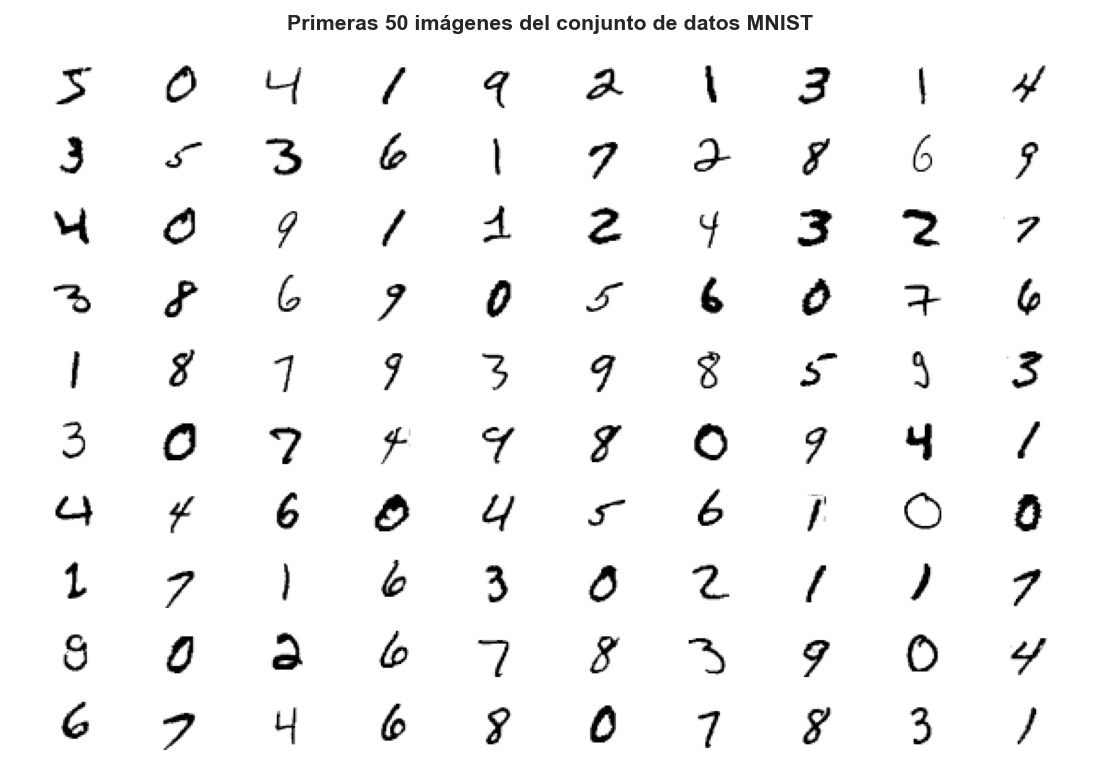

In [17]:
# Mostramos los primeros 50 dígitos de este conjunto de datos.
fig, ax = plt.subplots(10, 10, figsize=(10, 7), dpi=110)
for i, ax_k in enumerate(ax.flat):
    ax_k.imshow(X[i], cmap="Grays")
    ax_k.axis('off')
fig.suptitle("Primeras 50 imágenes del conjunto de datos MNIST", fontsize=14, fontweight="bold")
plt.tight_layout();

### Perspectiva de la máxima varianza.
La Fig. (1.4) ilustra la idea de cómo representar un conjunto de datos que "vive" en un dominio de $\mathbb{R}^{2}$ por medio de una única coordenada. Un total de tres rectas (o "hiperplanos" en 1D) cortan este conjunto de datos, proyectándose cada uno de estos puntos sobre el recorrido de estas rectas (sólida, segmentada y punteada). La representación reducida resultante de la proyección sobre la recta cuya traza es una línea sólida es la mejor, porque es la que captura la mayor información de todas ellas. Podemos evidenciar visualmente aquello porque la mayoría de los puntos proyectados sobre dicha recta, que llamamos $\mathbf{c}_{1}$, preservan la varianza del conjunto de datos original. Por otro lado, la proyección sobre la recta $\mathbf{c}_{2}$ preserva muy poco de dicha varianza, por lo que, al querer reconstruir los datos a partir de esa representación, perderíamos mucha información.

<p style="text-align: center;"><img src="figures/figure_1_4.png" width="900"></p>
<p style="text-align: center;">Fig. (1.4): Ilustración de un conjunto de datos definido en un dominio de $\mathbb{R}^{2}$ que. Al ser representado únicamente por medio de una componente resultante de una rotación, que llamamos $\mathbf{c}_{1}$, mantiene su representatividad sin perder una cantidad importante de información, porque la otra componente $\mathbf{c}_{2}$ (que es ortogonal a la primera) no añade mucha información. Por lo tanto, la gran mayoría de la varianza de este conjunto de datos está contenida únicamente en $\mathbf{c}_{1}$ (ejemplo adaptado del maravilloso libro "Hands-on Machine Learning with Scikit-Learn, Keras and Tensorflow", de Aurélien Géron)</p>

Si interpretamos que la cantidad de información contenida en un conjunto de datos puede estimarse a partir de qué tan "llenos" están los espacios entre los distintos puntos que lo conforman, entonces podemos describir tal contenido de información a partir de qué tan dispersos están los datos. De la [clase 1.5](https://github.com/rquezadac/udd_data_science_lectures/blob/main/PARTE%20I%20-%20Fundamentos%20matem%C3%A1ticos%20elementales/clase_1_5.ipynb), sabemos que **la varianza es un indicador de dicha dispersión**, pudiendo derivar el análisis de componentes principales como un algoritmo de reducción de dimensionalidad que maximiza la varianza de la representación reducida resultante de su aplicación, de manera tal que se preserve tanta información como sea posible. Esto es precisamente lo que ilustramos en la Fig. (1.4).

Sea $\mathcal{D} =\left\{ \mathbf{X} \in \mathbb{R}^{m\times n} \  :\  \mathbf{X} =\left\{ x_{ij} \right\} \wedge x_{ij}\in \mathcal{X} \right\}$ un conjunto de entrenamiento constituido por la matriz de diseño $\mathbf{X}$. Sea $\mathcal{X}$ el espacio de entrada de $\mathcal{D}$, el cual está generado por las filas (instancias) de $\mathbf{X}$ (es decir, $\mathcal{X} =\left\{ \mathbf{x}_{1} ,...,\mathbf{x}_{n} \right\} \wedge \mathbf{x}_{i} \in \mathbb{R}^{n} ;\forall i=1,...,m$). Supongamos que $\mathcal{X}$ está constituido por instancias independientes e idénticamente distribuidas (iid) con media $\mathbf{0}\in \mathbb{R}^{n}$ y covarianza $\mathbf{\Sigma}$, descrita por la ecuación (1.1). Consideremos además la representación reducida o comprimida $\mathbf{z}_{i}\in \mathbb{R}^{d}$ ($d<n$) de la $i$-ésima instancia $\mathbf{x}_{i}\in \mathbb{R}^{n}$ de $\mathcal{D}$, definida por la ecuación (1.2), siendo $\mathbf{P}\in \mathbb{R}^{n\times d}$ su correspondiente matriz proyectiva. Conforme el enfoque anterior, es claro que nuestro objetivo es encontrar una matriz $\mathbf{P}$ que retenga la mayor cantidad posible de información de $\mathcal{D}$ cuando "comprimimos" los datos de entrenamiento por medio de una proyección sobre un subespacio generado por las columnas $\left( \mathbf{p}_{1} ,...,\mathbf{p}_{d} \right)$ de $\mathbf{P}$. Retener una cantidad máxima de información de $\mathcal{D}$ una vez que los datos de entrenamiento son proyectados o "comprimidos" es equivalente a capturar o "preservar" la mayor cantidad posible de varianza de $\mathcal{D}$ por medio de su representación con menor dimensionalidad.

Sin pérdida de generalidad, asumiremos que el conjunto de entrenamiento $\mathcal{D}$ está **centrado**. La equivalencia entre la varianza de los datos reducidos representados por las instancias $\mathbf{z}_{i}$ ($i=1,...,m) y la varianza de los datos originales de entrenamiento será

$$\begin{array}{lll}\mathrm{Var} \left( \mathbf{z}_{i} \right)&=&\mathrm{Var} \left( \mathbf{P}^{\top} \left( \mathbf{x}_{i} -\mathbf{\mu} \right) \right)\\ &=&\mathrm{Var} \left( \mathbf{P}^{\top} \mathbf{x}_{i} -\mathbf{P}^{\top} \mathbf{\mu} \right)\\ &=&\mathrm{Var} \left( \mathbf{P}^{\top} \mathbf{x}_{i} \right)\end{array}$$
<p style="text-align: right;">$(1.4)$</p>

Es decir, la varianza de la representación reducida de $\mathbf{X}$, que llamaremos $\mathbf{Z}$ (y cuyas filas serán representadas por $\mathbf{z}_{i}$, para $i=1,...,m$), no depende de la media de los datos de entrenamiento. Por lo tanto, por el resto de esos apuntes, asumiremos que la matriz de diseño $\mathbf{X}$ estará constituida siempre por columnas con media $\mathbf{\mu}$ igual a $\mathbf{0}$. Bajo este supuesto, la media de las columnas de la representación reducida $\mathbf{Z}$ también es $\mathbf{0}$, ya que $\mathrm{E} \left[ \mathbf{z}_{i} \right] =\mathrm{E} \left[ \mathbf{P}^{\top} \mathbf{x}_{i} \right] =\mathbf{P}^{\top} \mathrm{E} \left[ \mathbf{x}_{i} \right] =\mathbf{0}$.

#### Dirección con varianza máxima.
Vamos a maximizar la varianza de $\mathbf{Z}$ usando un enfoque secuencial. Partiremos buscando un único vector $\mathbf{p}_{1}\in \mathbb{R}^{n}$ que maximice la varianza de los datos proyectados; es decir, queremos maximizar la varianza de la primera coordenada de $\mathbf{z}_{i}\in \mathbb{R}^{d}$, digamos $z_{i1}$. Por lo tanto, debemos resolver el problema

$$\max_{z_{i1}} \  \mathrm{Var} \left( z_{i1} \right) =\frac{1}{m} \sum_{i=1}^{m} z_{i1}^{2}$$
<p style="text-align: right;">$(1.5)$</p>

En la expresión (1.5), hemos explotado el hecho de que los datos de entrenamiento son iid. Notemos que la coordenada $z_{i1}$ puede expresarse como

$$z_{i1}=\mathbf{p}_{1}^{\top} \mathbf{x}_{i}$$
<p style="text-align: right;">$(1.6)$</p>

Es decir, $z_{i1}$ corresponde a la primera coordenada de la proyección ortogonal de $\mathbf{x}_{i}$ sobre el subespacio unidimensional generado por $\mathbf{p}_{1}$. Sustituyendo (1.6) en (1.5), obtenemos

$$\begin{array}{lll}\mathrm{Var} \left( z_{i1} \right)&=&\displaystyle \frac{1}{m} \sum_{i=1}^{m} \left( \mathbf{p}_{1}^{\top} \mathbf{x}_{i} \right)^{2}\\ &=&\displaystyle \frac{1}{m} \sum_{i=1}^{m} \mathbf{p}_{1}^{\top} \mathbf{x}_{i} \mathbf{x}_{i}^{\top} \mathbf{p}_{1}\\ &=&\displaystyle \mathbf{p}_{1}^{\top} \left( \frac{1}{m} \sum_{i=1}^{m} \mathbf{x}_{i} \mathbf{x}_{i}^{\top} \right) \mathbf{p}_{1}\\ &=&\displaystyle \mathbf{p}_{1}^{\top} \mathbf{S} \mathbf{p}_{1}\end{array}$$
<p style="text-align: right;">$(1.7)$</p>

Donde $\mathbf{S}$ es la matriz de covarianza definida en (1.1).

Notemos que el aumento arbitrario de la magnitud del vector $\mathbf{p}_{1}$ implica asimismo el aumento en la magnitud de $\mathrm{Var}(z_{i1})$. Es decir, un vector $\mathbf{p}_{1}$ que es el doble de grande (en magnitud) puede resultar en cuatro veces más varianza de la coordenada $z_{i1}$. Por lo tanto, restringimos todas las soluciones del problema (1.5) conforme la expresión $\left\Vert \mathbf{p}_{1} \right\Vert^{2} =1$, lo que finalmente resulta en un problema de optimización de tipo restringido en el cual buscamos la dirección en la cual los datos varían más:

$$\begin{array}{ll}\displaystyle \max_{\mathbf{p}_{1}}&\mathbf{p}_{1}^{\top} \mathbf{S} \mathbf{p}_{1}\\ \mathrm{s.a.:}&\displaystyle \left\Vert \mathbf{p}_{1} \right\Vert^{2} =1\end{array}$$
<p style="text-align: right;">$(1.8)$</p>

Para resolver (1.8), calculamos el correspondiente Lagrangiano, que resulta

$$\mathcal{L} \left( \mathbf{p}_{1} ,\lambda_{1} \right) =\mathbf{p}_{1}^{\top} \mathbf{S} \mathbf{p}_{1} +\lambda_{1} \left( 1-\mathbf{p}_{1}^{\top} \mathbf{p}_{1} \right)$$
<p style="text-align: right;">$(1.9)$</p>

Calculando las correspondientes derivadas parciales e igualándolas a cero, obtenemos

$$\begin{array}{rrcl}&\displaystyle \frac{\partial \mathcal{L}}{\partial \mathbf{p}_{1}}&=&2\mathbf{p}_{1}^{\top} \mathbf{S} -2\lambda_{1} \mathbf{p}_{1}^{\top}\\ \Longrightarrow&\displaystyle \frac{\partial \mathcal{L}}{\partial \mathbf{p}_{1}} =0&\Longleftrightarrow&\mathbf{S} \mathbf{p}_{1} =\lambda_{1} \mathbf{p}_{1}\end{array} \  \  \  ;\  \  \  \begin{array}{rrcl}&\displaystyle \frac{\partial \mathcal{L}}{\partial \lambda_{1}}&=&1-\mathbf{p}_{1}^{\top} \mathbf{p}_{1}\\ \Longrightarrow&\displaystyle \frac{\partial \mathcal{L}}{\partial \lambda_{1}} =0&\Longleftrightarrow&\mathbf{p}_{1}^{\top} \mathbf{p}_{1} =1\end{array}$$
<p style="text-align: right;">$(1.10)$</p>

De la solución del lado izquierdo de (1.10), podemos observar que $\mathbf{p}_{1}$ es un autovector de la matriz de covarianza $\mathbf{S}$, mientras que el multiplicador de Lagrange $\lambda_{1}$ es su correspondiente autovalor. La varianza de la coordenada $z_{i1}$, que denotaremos como $V_{1}$, puede por tanto escribirse como

$$\begin{array}{lll}V_{1}&=&\mathbf{p}_{1}^{\top} \mathbf{S} \mathbf{p}_{1}\\ &=&\lambda_{1} \underbrace{\mathbf{p}_{1}^{\top} \mathbf{p}_{1}}_{\mathbf{p}_{1}^{\top} \mathbf{p}_{1} =1}\\ &=&\lambda_{1}\end{array}$$
<p style="text-align: right;">$(1.11)$</p>

Es decir, la varianza de los datos de $\mathcal{D}$ proyectada sobre un subespacio unidimensional es igual al autovalor asociado al vector base $\mathbf{p}_{1}$ que genera dicho subespacio. Por lo tanto, a fin de maximizar la varianza de la primera coordenada asociada a la representación reducida $\mathbf{z}_{i}$ de $\mathbf{x}_{i}$, escogemos el vector base con el máximo autovalor de la matriz de covarianza $\mathbf{S}$. Dicho autovector se denomina **primera componente principal** de $\mathbf{x}_{i}$. Es posible determinar la contribución o efecto de $\mathbf{p}_{1}$ en el espacio de entrada original mapeando a $z_{i1}$ de vuelta en dicho espacio, lo que nos da el correspondiente punto proyectado:

$$\widetilde{\mathbf{x}}_{i} =\mathbf{p}_{1} z_{i1}=\mathbf{p}_{1} \mathbf{p}_{1}^{\top} \mathbf{x}_{i} \in \mathbb{R}^{n}$$
<p style="text-align: right;">$(1.12)$</p>